In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
Bike_Sharing_Data = pd.read_csv("day.csv")
Bike_Sharing_Data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


# Reading and Understanding the Data

In [3]:
Bike_Sharing_Data.shape

(730, 16)

In [4]:
Bike_Sharing_Data.info() # Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
Bike_Sharing_Data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
Bike_Sharing_Data_V = Bike_Sharing_Data.drop(["instant","dteday","casual","registered"], axis=1)# Dropping the columns which are not required

In [7]:
Bike_Sharing_Data_V.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
vars = ["cnt","windspeed","hum","temp"]

In [9]:
# Visualizing the numeric variables
Bike_Sharing_Data_V[vars]

,cnt,windspeed,hum,temp
0,985,10.749882,80.5833,14.110847
1,801,16.652113,69.6087,14.902598
2,1349,16.636703,43.7273,8.050924
3,1562,10.739832,59.0435,8.200000
4,1600,12.522300,43.6957,9.305237
...,...,...,...,...
725,2114,23.458911,65.2917,10.420847
726,3095,10.416557,59.0000,10.386653
727,1341,8.333661,75.2917,10.386653
728,1796,23.500518,48.3333,10.489153


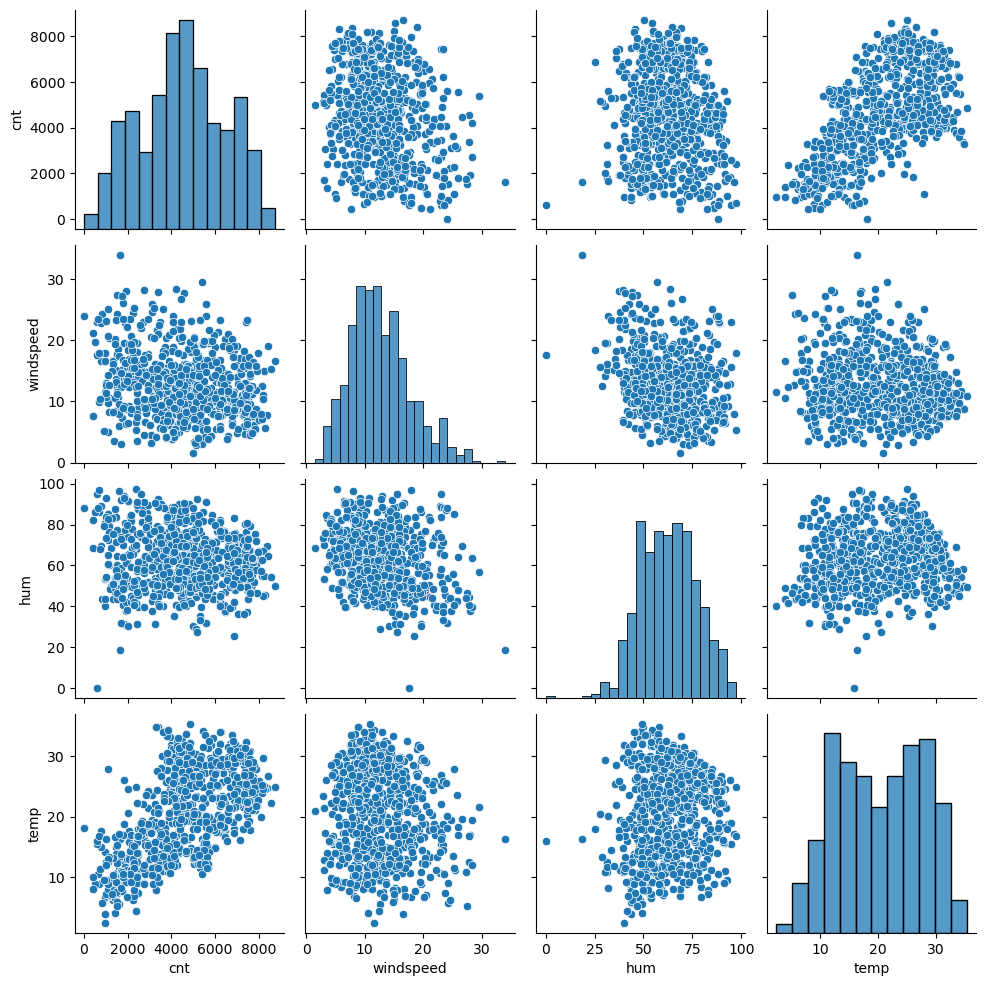

In [10]:
#Plotting a pair plot
sns.pairplot(Bike_Sharing_Data_V[vars])
plt.show()

In [11]:
# Checking the correlation
Bike_Sharing_Data_V[vars].corr()

,cnt,windspeed,hum,temp
cnt,1.000000,-0.235132,-0.098543,0.627044
windspeed,-0.235132,1.000000,-0.248506,-0.158186
hum,-0.098543,-0.248506,1.000000,0.128565
temp,0.627044,-0.158186,0.128565,1.000000


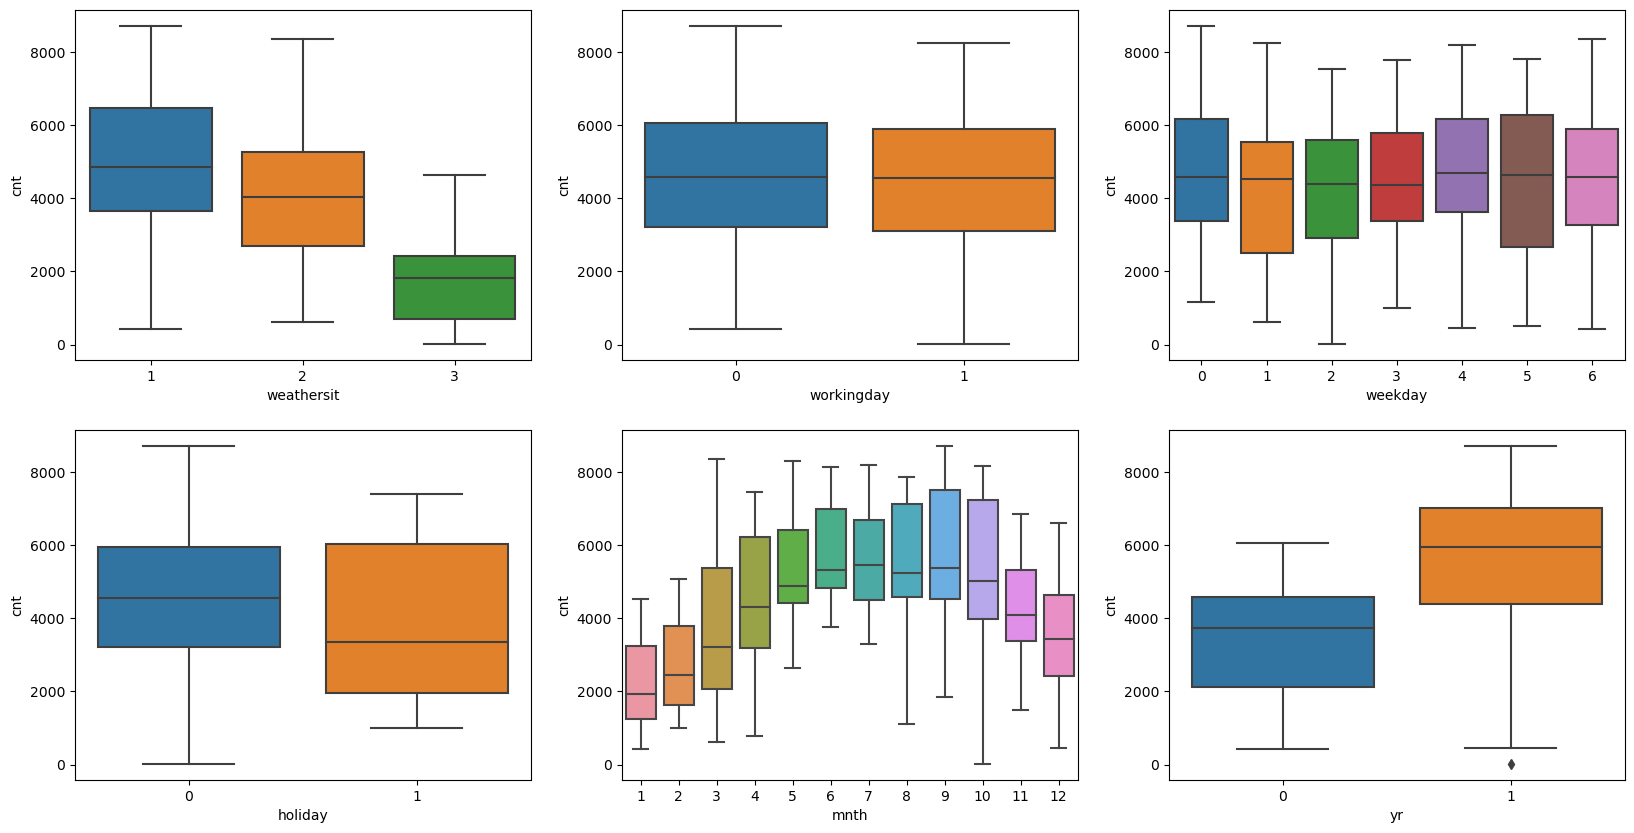

In [12]:
# Visualizing the categorical variables
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.boxplot(x = "weathersit", y = "cnt", data = Bike_Sharing_Data_V)

plt.subplot(2,3,2)
sns.boxplot(x = "workingday", y = "cnt", data = Bike_Sharing_Data_V)

plt.subplot(2,3,3)
sns.boxplot(x = "weekday", y = "cnt", data = Bike_Sharing_Data_V)

plt.subplot(2,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = Bike_Sharing_Data_V)

plt.subplot(2,3,5)
sns.boxplot(x = "mnth", y = "cnt", data = Bike_Sharing_Data_V)

plt.subplot(2,3,6)
sns.boxplot(x = "yr", y = "cnt", data = Bike_Sharing_Data_V)

plt.show()

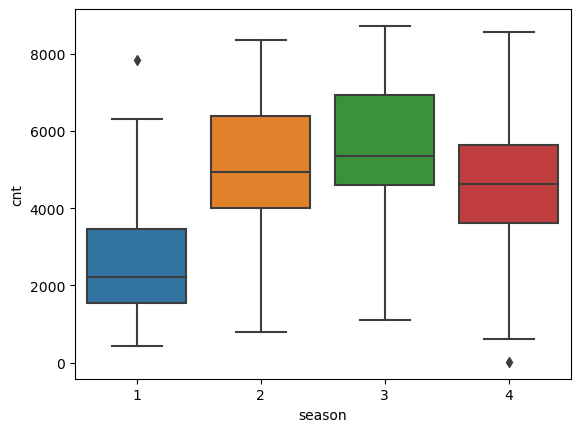

In [13]:
# Plotting cnt vs season
sns.boxplot(x = "season", y = "cnt", data = Bike_Sharing_Data_V)
plt.show()

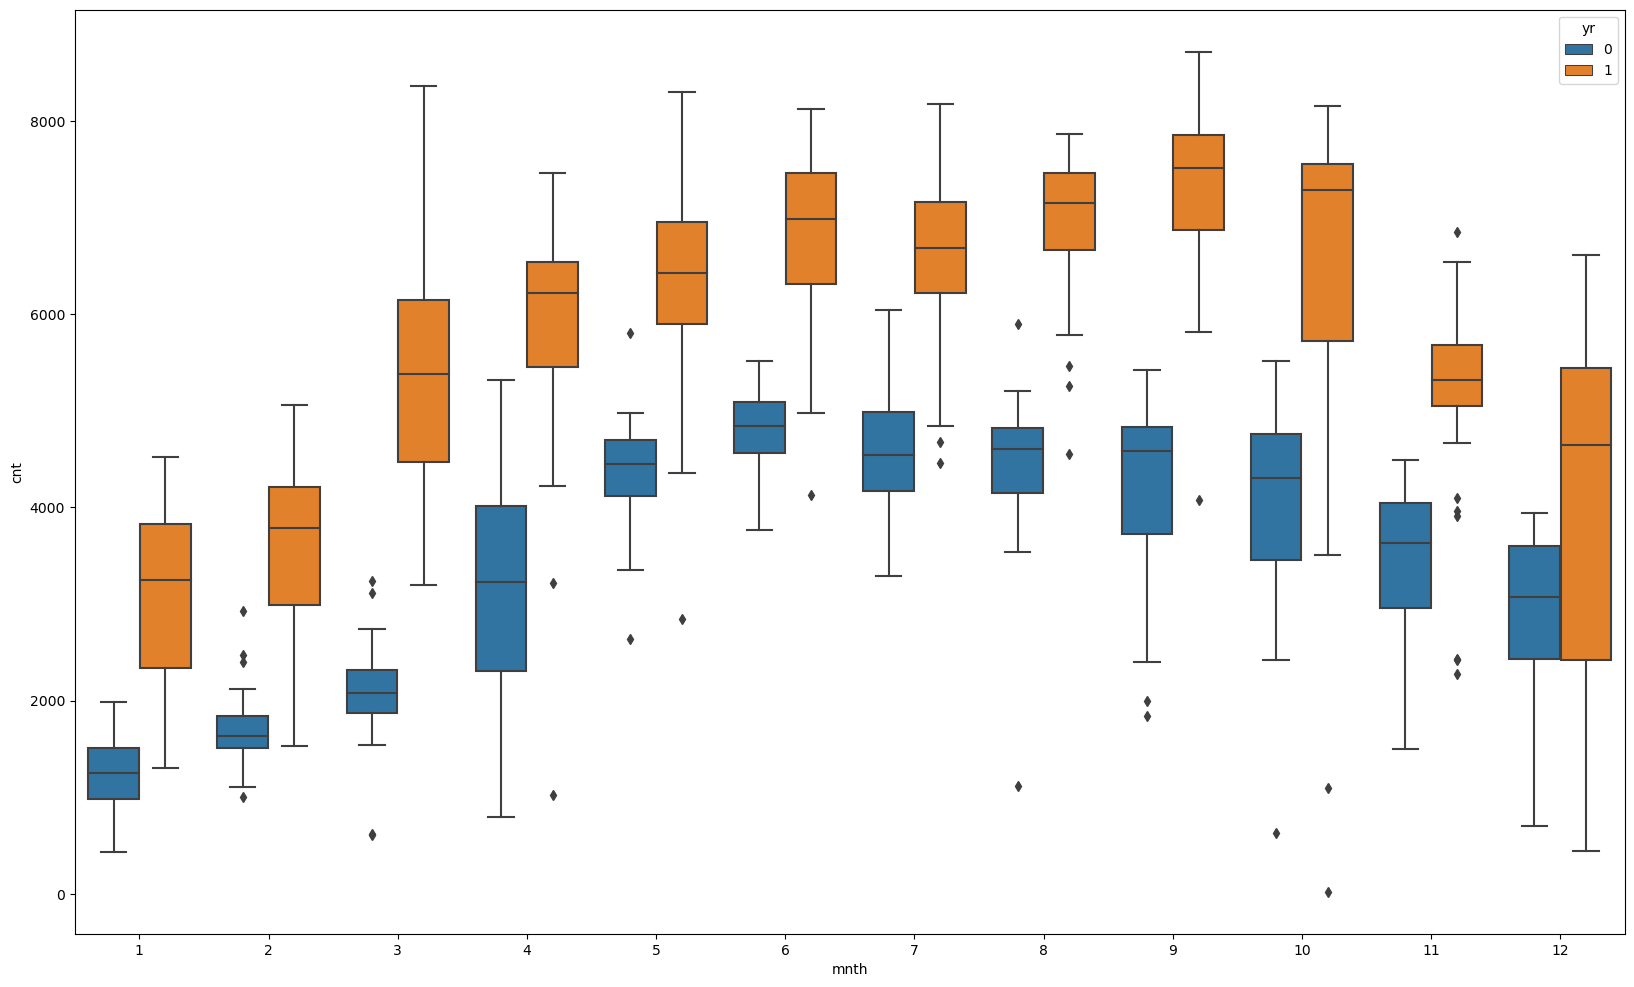

In [14]:
#Plotting cnt vs month for 2018 as well as 2019. For year, 0 indicates 2018 and 1 indicates 2019
plt.figure(figsize = (20,12))
sns.boxplot(x = "mnth", y = "cnt", hue = "yr", data = Bike_Sharing_Data_V)
plt.show()

# Data Preparation

In [15]:
Bike_Sharing_Data_V.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
#Season
Bike_Sharing_Data_V.season.dtype

dtype('int64')

In [17]:
Bike_Sharing_Data_V['season'] = Bike_Sharing_Data_V['season'].apply(str) #Converting season to string

In [18]:
Bike_Sharing_Data_V['season'] = Bike_Sharing_Data_V['season'].replace({"1":"spring", "2":"summer", "3":"fall", "4":"winter"}, regex = True) #Replacing 1,2 3,4 with corresponding season names 

In [19]:
Bike_Sharing_Data_V['season'].value_counts() #Checking the count for each season in dataset

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
#Obtaining the dummy for season column
season_dummy = pd.get_dummies(Bike_Sharing_Data_V['season'],drop_first = True)
season_dummy

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [21]:
Bike_Sharing_Data_V = pd.concat([Bike_Sharing_Data_V,season_dummy], axis=1) # Combining the columns with main data

In [22]:
Bike_Sharing_Data_V.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [23]:
Bike_Sharing_Data_V = Bike_Sharing_Data_V.drop("season", axis=1) #Dropping the season column

In [24]:
Bike_Sharing_Data_V.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [25]:
# The process for season is repeated for remaining non-numeric variables

In [26]:
Bike_Sharing_Data_V.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [27]:
Bike_Sharing_Data_V.rename(columns = {"yr" : "year", "mnth": "month", "hum":"humidity", "cnt":"demand"}, inplace = True)

In [28]:
Bike_Sharing_Data_V.rename(columns = {"humidityidity" : "humidity"}, inplace = True)

In [29]:
Bike_Sharing_Data_V.head()

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,demand,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [30]:
Bike_Sharing_Data_V["month"] = Bike_Sharing_Data_V["month"].replace({1:"Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}, regex = True)

In [31]:
Bike_Sharing_Data_V

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,demand,spring,summer,winter
0,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114,1,0,0
726,1,Dec,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095,1,0,0
727,1,Dec,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341,1,0,0
728,1,Dec,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,0


In [32]:
Bike_Sharing_Data_V["weekday"] = Bike_Sharing_Data_V["weekday"].replace({0:"Sun", 1: "Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat"}, regex = True)

In [33]:
Bike_Sharing_Data_V.head()

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,demand,spring,summer,winter
0,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [34]:
Bike_Sharing_Data_V["weathersit"] = Bike_Sharing_Data_V["weathersit"].replace({1: "Weather_1", 2: "Weather_2", 3: "Weather_3", 4: "Weather_4"}, regex = True)

In [35]:
Bike_Sharing_Data_V

,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,demand,spring,summer,winter
0,0,Jan,0,Mon,1,Weather_2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,Weather_2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Weather_1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Weather_1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Weather_1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,Dec,0,Fri,1,Weather_2,10.420847,11.33210,65.2917,23.458911,2114,1,0,0
726,1,Dec,0,Sat,0,Weather_2,10.386653,12.75230,59.0000,10.416557,3095,1,0,0
727,1,Dec,0,Sun,0,Weather_2,10.386653,12.12000,75.2917,8.333661,1341,1,0,0
728,1,Dec,0,Mon,1,Weather_1,10.489153,11.58500,48.3333,23.500518,1796,1,0,0


In [36]:
Month_dummy = pd.get_dummies(Bike_Sharing_Data_V['month'])
Weekday_dummy = pd.get_dummies(Bike_Sharing_Data_V['weekday'])
Weathersit_dummy = pd.get_dummies(Bike_Sharing_Data_V['weathersit'])


In [37]:
Month_dummy = Month_dummy.drop("Dec", axis=1)
Month_dummy

,Apr,Aug,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0
726,0,0,0,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,0
728,0,0,0,0,0,0,0,0,0,0,0


In [38]:
Weekday_dummy = Weekday_dummy.drop("Sat", axis=1)
Weekday_dummy

,Fri,Mon,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
725,1,0,0,0,0,0
726,0,0,0,0,0,0
727,0,0,1,0,0,0
728,0,1,0,0,0,0


In [39]:
Weathersit_dummy 

,Weather_1,Weather_2,Weather_3
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [40]:
Bike_Sharing_Data_V = pd.concat([Bike_Sharing_Data_V,Month_dummy,Weekday_dummy,Weathersit_dummy], axis=1)

In [41]:
Bike_Sharing_Data_V.columns

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'humidity', 'windspeed', 'demand', 'spring', 'summer',
       'winter', 'Apr', 'Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Fri', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Weather_1',
       'Weather_2', 'Weather_3'],
      dtype='object')

In [42]:
Bike_Sharing_Data_V = Bike_Sharing_Data_V.drop(["month","weekday","weathersit","atemp"], axis=1)

In [43]:
Bike_Sharing_Data_V.dtypes

year            int64
holiday         int64
workingday      int64
temp          float64
humidity      float64
windspeed     float64
demand          int64
spring          uint8
summer          uint8
winter          uint8
Apr             uint8
Aug             uint8
Feb             uint8
Jan             uint8
Jul             uint8
Jun             uint8
Mar             uint8
May             uint8
Nov             uint8
Oct             uint8
Sep             uint8
Fri             uint8
Mon             uint8
Sun             uint8
Thu             uint8
Tue             uint8
Wed             uint8
Weather_1       uint8
Weather_2       uint8
Weather_3       uint8
dtype: object

In [44]:
Bike_Sharing_Data_V.head()

,year,holiday,workingday,temp,humidity,windspeed,demand,spring,summer,winter,...,Sep,Fri,Mon,Sun,Thu,Tue,Wed,Weather_1,Weather_2,Weather_3
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [45]:
Bike_Sharing_Data_V.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'demand', 'spring', 'summer', 'winter', 'Apr', 'Aug', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed', 'Weather_1', 'Weather_2', 'Weather_3'],
      dtype='object')

# Splitting the data into training and test sets

In [46]:
Train_Data, Test_Data = train_test_split(Bike_Sharing_Data_V, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
Train_Data

,year,holiday,workingday,temp,humidity,windspeed,demand,spring,summer,winter,...,Sep,Fri,Mon,Sun,Thu,Tue,Wed,Weather_1,Weather_2,Weather_3
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664,0,1,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,1,0,0,0,0,0,1,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,1,0,0,0,0,0,1,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [48]:
Test_Data

,year,holiday,workingday,temp,humidity,windspeed,demand,spring,summer,winter,...,Sep,Fri,Mon,Sun,Thu,Tue,Wed,Weather_1,Weather_2,Weather_3
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,1,0,0,0,0,0,1,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,10.899153,68.7917,11.791732,2947,1,0,0,...,0,0,0,0,0,1,0,0,1,0
702,1,0,1,19.509153,73.3750,11.666643,6606,0,0,1,...,0,0,0,0,0,0,1,1,0,0
127,0,0,1,21.661653,63.1667,5.000712,4333,0,1,0,...,0,0,0,0,0,1,0,1,0,0
640,1,0,1,26.957500,79.3750,4.458569,7572,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## Rescaling the features

In [49]:
# Applying scaling to all the columns except binary and dummy variables
scaler = MinMaxScaler()
Scalable_variables = ["temp","humidity","windspeed","demand"]
Train_Data[Scalable_variables] = scaler.fit_transform(Train_Data[Scalable_variables])

Train_Data.head()

,year,holiday,workingday,temp,humidity,windspeed,demand,spring,summer,winter,...,Sep,Fri,Mon,Sun,Thu,Tue,Wed,Weather_1,Weather_2,Weather_3
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [50]:
y_train = Train_Data.pop("demand")
X_train = Train_Data

In [51]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: demand, Length: 510, dtype: float64

# Building a Linear Model

In [52]:
Bike_Sharing_Data_V.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'demand', 'spring', 'summer', 'winter', 'Apr', 'Aug', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed', 'Weather_1', 'Weather_2', 'Weather_3'],
      dtype='object')

In [53]:
# Running RFE with the output number of the variable equal to 15. 15 is an arbitrary value assumed as there are 30 fields in this data
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Apr', False, 12),
 ('Aug', False, 2),
 ('Feb', False, 10),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 9),
 ('May', False, 15),
 ('Nov', False, 14),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Fri', False, 5),
 ('Mon', False, 7),
 ('Sun', False, 13),
 ('Thu', False, 4),
 ('Tue', False, 8),
 ('Wed', False, 6),
 ('Weather_1', True, 1),
 ('Weather_2', True, 1),
 ('Weather_3', True, 1)]

In [55]:
Variables_Required = X_train.columns[rfe.support_]
Variables_Required

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Oct', 'Sep', 'Weather_1', 'Weather_2',
       'Weather_3'],
      dtype='object')

## Building the model using statsmodel for detailed statistics

In [56]:
X_train_using_rfe = X_train[Variables_Required]


In [57]:
X_train_using_rfe_new = sm.add_constant(X_train_using_rfe)

In [58]:
lm = sm.OLS(y_train, X_train_using_rfe_new).fit()

lm.params

const        0.157619
year         0.230627
holiday     -0.095201
temp         0.494265
humidity    -0.168378
windspeed   -0.189932
spring      -0.058127
summer       0.047199
winter       0.075144
Jan         -0.035792
Jul         -0.053054
Oct          0.038451
Sep          0.086536
Weather_1    0.152939
Weather_2    0.098432
Weather_3   -0.093751
dtype: float64

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.95e-190
Time:                        22:30:57   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1576      0.029      5.417      0.000       0.100       0.215
year           0.2306      0.008     28.512      0.000       0.215       0.247
holiday       -0.0952      0.025     -3.745      0.000      -0.145      -0.045
temp           0.4943      0.036     13.847      0.000       0.424       0.564
humidity      -0.1684      0.038     -4.475      0.000      -0.242      -0.094
windspeed     -0.1899      0.026     -7.372      0.000      -0.241      -0.139
spring        -0.0581      0.021     -2.759      0.006      -0.100      -0.017
summer         0.0472      0.015      3.140      0.002       0.018       0.077
winter         0.0751      0.019      3.907      0.000       0.037       0.113
Jan           -0.0358      0.018     -2.037      0.042      -0.070      -0.001
Jul           -0.0531      0.018     -2.903      0.004      -0.089      -0.017
Oct            0.0385      0.017      2.197      0.028       0.004       0.073
Sep            0.0865      0.017      5.171      0.000       0.054       0.119
Weather_1      0.1529      0.011     14.331      0.000       0.132       0.174
Weather_2      0.0984      0.013      7.813      0.000       0.074       0.123
Weather_3     -0.0938      0.022     -4.249      0.000      -0.137      -0.050
==============================================================================
Omnibus:                       69.313   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.326
Skew:                          -0.704   Prob(JB):                     1.70e-37
Kurtosis:                       5.447   Cond. No.                     9.06e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [60]:
X_train_using_rfe_new.columns

Index(['const', 'year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'Jul', 'Oct', 'Sep', 'Weather_1',
       'Weather_2', 'Weather_3'],
      dtype='object')

## Calculate VIF for the given model

In [61]:
VIF = pd.DataFrame()
X = X_train_using_rfe
VIF["Features"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["VIF"] = round(VIF["VIF"], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
12,Weather_1,49.98
13,Weather_2,32.75
5,spring,5.18
7,winter,4.39
14,Weather_3,4.16
2,temp,4.11
6,summer,2.65
3,humidity,1.91
8,Jan,1.57
10,Oct,1.53


In [62]:
X_train_using_rfe.columns

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Jan', 'Jul', 'Oct', 'Sep', 'Weather_1', 'Weather_2',
       'Weather_3'],
      dtype='object')

In [63]:
X_train_using_rfe = X_train_using_rfe.drop(["Weather_1"], axis = 1)

In [64]:
X_train_using_rfe_new = sm.add_constant(X_train_using_rfe)

lm = sm.OLS(y_train, X_train_using_rfe_new).fit()

lm.params

const        0.310558
year         0.230627
holiday     -0.095201
temp         0.494265
humidity    -0.168378
windspeed   -0.189932
spring      -0.058127
summer       0.047199
winter       0.075144
Jan         -0.035792
Jul         -0.053054
Oct          0.038451
Sep          0.086536
Weather_2   -0.054507
Weather_3   -0.246690
dtype: float64

In [65]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.95e-190
Time:                        22:30:59   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3106      0.035      8.761      0.000       0.241       0.380
year           0.2306      0.008     28.512      0.000       0.215       0.247
holiday       -0.0952      0.025     -3.745      0.000      -0.145      -0.045
temp           0.4943      0.036     13.847      0.000       0.424       0.564
humidity      -0.1684      0.038     -4.475      0.000      -0.242      -0.094
windspeed     -0.1899      0.026     -7.372      0.000      -0.241      -0.139
spring        -0.0581      0.021     -2.759      0.006      -0.100      -0.017
summer         0.0472      0.015      3.140      0.002       0.018       0.077
winter         0.0751      0.019      3.907      0.000       0.037       0.113
Jan           -0.0358      0.018     -2.037      0.042      -0.070      -0.001
Jul           -0.0531      0.018     -2.903      0.004      -0.089      -0.017
Oct            0.0385      0.017      2.197      0.028       0.004       0.073
Sep            0.0865      0.017      5.171      0.000       0.054       0.119
Weather_2     -0.0545      0.010     -5.215      0.000      -0.075      -0.034
Weather_3     -0.2467      0.026     -9.351      0.000      -0.299      -0.195
==============================================================================
Omnibus:                       69.313   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.326
Skew:                          -0.704   Prob(JB):                     1.70e-37
Kurtosis:                       5.447   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
VIF = pd.DataFrame()
X = X_train_using_rfe
VIF["Features"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["VIF"] = round(VIF["VIF"], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
3,humidity,29.28
2,temp,17.10
4,windspeed,4.66
5,spring,4.34
7,winter,3.98
6,summer,2.78
12,Weather_2,2.29
0,year,2.09
8,Jan,1.67
10,Oct,1.61


In [67]:
X_train_using_rfe = X_train_using_rfe.drop(["humidity"], axis = 1)

In [68]:
X_train_using_rfe.columns

Index(['year', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Jan', 'Jul', 'Oct', 'Sep', 'Weather_2', 'Weather_3'],
      dtype='object')

In [69]:
X_train_using_rfe_new = sm.add_constant(X_train_using_rfe)

lm = sm.OLS(y_train, X_train_using_rfe_new).fit()

lm.params

const        0.228811
year         0.234765
holiday     -0.095783
temp         0.454765
windspeed   -0.157302
spring      -0.067656
summer       0.040329
winter       0.059759
Jan         -0.040615
Jul         -0.047927
Oct          0.036713
Sep          0.080045
Weather_2   -0.081321
Weather_3   -0.292733
dtype: float64

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.3
Date:                Tue, 02 May 2023   Prob (F-statistic):          7.24e-187
Time:                        22:31:00   Log-Likelihood:                 503.65
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     496   BIC:                            -920.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2288      0.031      7.392      0.000       0.168       0.290
year           0.2348      0.008     28.670      0.000       0.219       0.251
holiday       -0.0958      0.026     -3.698      0.000      -0.147      -0.045
temp           0.4548      0.035     12.904      0.000       0.386       0.524
windspeed     -0.1573      0.025     -6.248      0.000      -0.207      -0.108
spring        -0.0677      0.021     -3.167      0.002      -0.110      -0.026
summer         0.0403      0.015      2.647      0.008       0.010       0.070
winter         0.0598      0.019      3.099      0.002       0.022       0.098
Jan           -0.0406      0.018     -2.273      0.023      -0.076      -0.006
Jul           -0.0479      0.019     -2.579      0.010      -0.084      -0.011
Oct            0.0367      0.018      2.059      0.040       0.002       0.072
Sep            0.0800      0.017      4.712      0.000       0.047       0.113
Weather_2     -0.0813      0.009     -9.320      0.000      -0.098      -0.064
Weather_3     -0.2927      0.025    -11.827      0.000      -0.341      -0.244
==============================================================================
Omnibus:                       70.358   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.152
Skew:                          -0.711   Prob(JB):                     2.51e-38
Kurtosis:                       5.475   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
VIF = pd.DataFrame()
X = X_train_using_rfe
VIF["Features"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["VIF"] = round(VIF["VIF"], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,temp,5.23
3,windspeed,4.62
4,spring,2.76
5,summer,2.24
6,winter,2.23
0,year,2.08
7,Jan,1.61
8,Jul,1.60
9,Oct,1.60
11,Weather_2,1.56


In [72]:
X_train_using_rfe = X_train_using_rfe.drop(["temp"], axis = 1)

In [73]:
X_train_using_rfe.columns

Index(['year', 'holiday', 'windspeed', 'spring', 'summer', 'winter', 'Jan',
       'Jul', 'Oct', 'Sep', 'Weather_2', 'Weather_3'],
      dtype='object')

In [74]:
X_train_using_rfe_new = sm.add_constant(X_train_using_rfe)

lm = sm.OLS(y_train, X_train_using_rfe_new).fit()

lm.params

const        0.585329
year         0.247826
holiday     -0.094835
windspeed   -0.189842
spring      -0.258374
summer      -0.041460
winter      -0.106840
Jan         -0.102057
Jul         -0.009088
Oct          0.093789
Sep          0.081911
Weather_2   -0.088614
Weather_3   -0.314034
dtype: float64

In [75]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          6.00e-157
Time:                        22:31:01   Log-Likelihood:                 429.84
No. Observations:                 510   AIC:                            -833.7
Df Residuals:                     497   BIC:                            -778.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5853      0.016     36.331      0.000       0.554       0.617
year           0.2478      0.009     26.416      0.000       0.229       0.266
holiday       -0.0948      0.030     -3.171      0.002      -0.154      -0.036
windspeed     -0.1898      0.029     -6.564      0.000      -0.247      -0.133
spring        -0.2584      0.018    -14.510      0.000      -0.293      -0.223
summer        -0.0415      0.016     -2.592      0.010      -0.073      -0.010
winter        -0.1068      0.017     -6.460      0.000      -0.139      -0.074
Jan           -0.1021      0.020     -5.132      0.000      -0.141      -0.063
Jul           -0.0091      0.021     -0.429      0.668      -0.051       0.033
Oct            0.0938      0.020      4.704      0.000       0.055       0.133
Sep            0.0819      0.020      4.177      0.000       0.043       0.120
Weather_2     -0.0886      0.010     -8.815      0.000      -0.108      -0.069
Weather_3     -0.3140      0.029    -11.013      0.000      -0.370      -0.258
==============================================================================
Omnibus:                       52.293   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.908
Skew:                          -0.558   Prob(JB):                     1.51e-26
Kurtosis:                       5.085   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
VIF = pd.DataFrame()
X = X_train_using_rfe
VIF["Features"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["VIF"] = round(VIF["VIF"], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,windspeed,3.86
3,spring,2.75
5,winter,2.21
4,summer,2.01
0,year,1.83
6,Jan,1.60
8,Oct,1.57
10,Weather_2,1.52
7,Jul,1.20
9,Sep,1.17


In [77]:
X_train_using_rfe = X_train_using_rfe.drop(["Jul"], axis = 1)

In [78]:
X_train_using_rfe.columns

Index(['year', 'holiday', 'windspeed', 'spring', 'summer', 'winter', 'Jan',
       'Oct', 'Sep', 'Weather_2', 'Weather_3'],
      dtype='object')

In [79]:
X_train_using_rfe_new = sm.add_constant(X_train_using_rfe)

lm = sm.OLS(y_train, X_train_using_rfe_new).fit()

lm.params

const        0.581950
year         0.247863
holiday     -0.094604
windspeed   -0.189780
spring      -0.255132
summer      -0.038232
winter      -0.103888
Jan         -0.102100
Oct          0.094083
Sep          0.084481
Weather_2   -0.088317
Weather_3   -0.314175
dtype: float64

In [80]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 demand   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     164.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.00e-158
Time:                        22:31:02   Log-Likelihood:                 429.75
No. Observations:                 510   AIC:                            -835.5
Df Residuals:                     498   BIC:                            -784.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5819      0.014     41.437      0.000       0.554       0.610
year           0.2479      0.009     26.443      0.000       0.229       0.266
holiday       -0.0946      0.030     -3.167      0.002      -0.153      -0.036
windspeed     -0.1898      0.029     -6.567      0.000      -0.247      -0.133
spring        -0.2551      0.016    -15.835      0.000      -0.287      -0.223
summer        -0.0382      0.014     -2.710      0.007      -0.066      -0.011
winter        -0.1039      0.015     -6.913      0.000      -0.133      -0.074
Jan           -0.1021      0.020     -5.138      0.000      -0.141      -0.063
Oct            0.0941      0.020      4.725      0.000       0.055       0.133
Sep            0.0845      0.019      4.527      0.000       0.048       0.121
Weather_2     -0.0883      0.010     -8.814      0.000      -0.108      -0.069
Weather_3     -0.3142      0.028    -11.028      0.000      -0.370      -0.258
==============================================================================
Omnibus:                       52.575   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.142
Skew:                          -0.562   Prob(JB):                     1.34e-26
Kurtosis:                       5.084   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
VIF = pd.DataFrame()
X = X_train_using_rfe
VIF["Features"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
VIF["VIF"] = round(VIF["VIF"], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
2,windspeed,3.50
3,spring,2.58
5,winter,2.12
4,summer,1.85
0,year,1.77
6,Jan,1.59
7,Oct,1.57
9,Weather_2,1.52
8,Sep,1.15
10,Weather_3,1.09


# Residual Analysis of Data

Now it is time to verify whether the error terms are normally distributed or not?


In [82]:
y_train_demand = lm.predict(X_train_using_rfe_new)

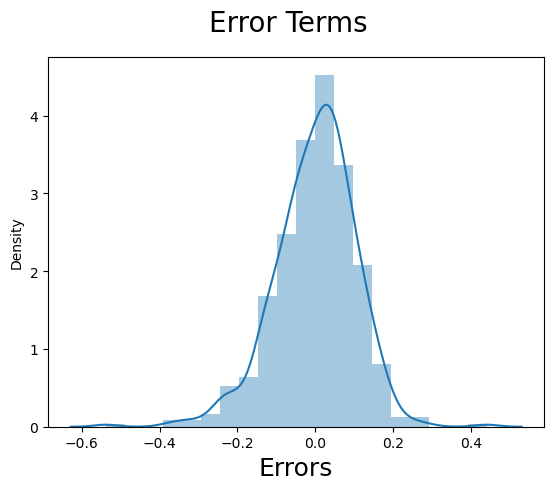

In [83]:
fig = plt.figure()
sns.distplot((y_train - y_train_demand), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)   
plt.show()

## Making the predictions using the final model

Equation obtained is:
demand = 0.5819 + 0.2479*year + (-0.0946)*holiday + (-0.1898)*windspeed + (-0.2551)*spring + (-0.0382)*summer + (-0.1039)*winter + (-0.1021)*Jan + (0.0941)*Oct + (0.0845)*Sep + (-0.0883)*Weather_2 + (-0.3142)*Weather_3

### Scaling the test sets

In [84]:
Test_Data.head()
Test_Data.columns

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'demand', 'spring', 'summer', 'winter', 'Apr', 'Aug', 'Feb', 'Jan',
       'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Fri', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed', 'Weather_1', 'Weather_2', 'Weather_3'],
      dtype='object')

In [85]:
Variables_Numeric = ["temp","humidity","windspeed","demand"]
Test_Data[Variables_Numeric] = scaler.transform(Test_Data[Variables_Numeric])

In [86]:
Test_Data

,year,holiday,workingday,temp,humidity,windspeed,demand,spring,summer,winter,...,Sep,Fri,Mon,Sun,Thu,Tue,Wed,Weather_1,Weather_2,Weather_3
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,1,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,1,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.708888,0.287411,0.336516,1,0,0,...,0,0,0,0,0,1,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.757478,0,0,1,...,0,0,0,0,0,0,1,1,0,0
127,0,0,1,0.584649,0.650923,0.069510,0.495973,0,1,0,...,0,0,0,0,0,1,0,1,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.868615,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [87]:
y_test = Test_Data.pop("demand")
X_test = Test_Data

In [88]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: demand, Length: 219, dtype: float64

In [89]:
X_test_updated = X_test[X_train_using_rfe.columns]
X_test_updated = sm.add_constant(X_test_updated)

In [90]:
y_pred = lm.predict(X_test_updated)

### Calculating R2_score of Test Set

In [91]:
r2_score(y_true = y_test,y_pred = y_pred)

0.7560114444143698

R2-Score of the model is 0.784 and for test set, it is 0.756. This means that the given model is working good for test set.